In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QaQkIwDAs-lQveCIPXZy9KUVt3F3s7DVnPk8lQWLbpJL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'placementprediction-donotdelete-pr-l7qdgyhqldpt8f'
object_key = 'finalplacementdata3.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,T150054001,11,11,10,11,10.00,4.3,8.2,8.4,8.3,8.1,8.0,1
1,T150054002,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1
2,T150054003,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1
3,T150054004,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0
4,T150054005,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0


In [4]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 36.5 MB/s eta 0:00:00


# IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#sampling 
from imblearn.combine import SMOTETomek

#splitting data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

#warnings
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [7]:
#returns the rows and columns in the dataframe
df.shape

(330, 13)

There are 330 rows and 13 columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RegNo.            330 non-null    object 
 1   Quants            330 non-null    int64  
 2   LogicalReasoning  330 non-null    int64  
 3   Verbal            330 non-null    int64  
 4   Programming       330 non-null    int64  
 5   CGPA              330 non-null    float64
 6   Networking        330 non-null    float64
 7   CloudComp         330 non-null    float64
 8   WebServices       330 non-null    float64
 9   DataAnalytics     330 non-null    float64
 10  QualityAssurance  330 non-null    float64
 11  AI                330 non-null    float64
 12  Placed            330 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 33.6+ KB


There are no null values in any of the feature. Great!
And the dataset contains only numerical values except, the RegNo. and Placed feature is a categorical column with binary attributes.

In [8]:
#returns the descriptive statistics of all the features in the dataset
df.describe()

,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,15.830303,15.990909,15.872727,15.957576,7.995636,6.360303,7.720606,7.796667,6.517576,6.414848,6.707576,0.363636
std,4.266394,4.432188,4.353196,4.151905,0.660623,1.605944,0.936039,0.889258,1.524788,1.727814,1.332310,0.481776
min,7.000000,7.000000,7.000000,7.000000,6.410000,2.500000,5.000000,5.500000,2.500000,1.800000,4.300000,0.000000
25%,14.000000,14.000000,14.000000,14.000000,7.590000,5.700000,7.500000,7.500000,5.700000,5.700000,5.700000,0.000000
50%,16.000000,16.000000,16.000000,16.000000,8.035000,6.600000,8.000000,7.900000,6.700000,6.650000,6.600000,0.000000
75%,19.000000,19.000000,19.000000,19.000000,8.400000,7.400000,8.300000,8.300000,7.500000,7.475000,7.650000,1.000000
max,25.000000,25.000000,25.000000,25.000000,10.000000,9.700000,9.500000,9.500000,9.400000,9.500000,9.800000,1.000000


**SCORES AND RANGES:**
* CGPA lies in the range of 6.41 - 10.
* The Soft Skills like Quants, Logical Reasoning, Verbal, Programming are graded out of 25.
* The Technical Skills like Networking, Cloud Computing and 4 others are graded out of 10.
* Placed is a categorical data representing 0 as Not Placed and 1 as Placed.

In [9]:
#returns the number of Placed and Not Placed values
df['Placed'].value_counts()

0    210
1    120
Name: Placed, dtype: int64

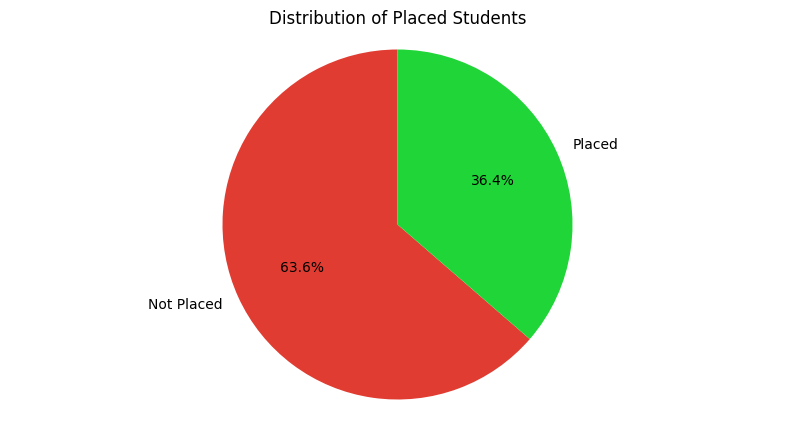

In [7]:
#visualizing to understand the counts better
plt.figure(figsize=(10, 5))
with sns.color_palette(['#E03C31','#1FD537']):
    plt.pie(df['Placed'].value_counts(), labels=['Not Placed', 'Placed'], autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Placed Students')
    plt.axis('equal')  
    plt.show()

Our data is imbalanced with 63.6% of Not Placed values and 36.4% Placed values. Training on such a data would make the model biased. So, we'll perform over_sampling in order to improve the efficiency of the model.

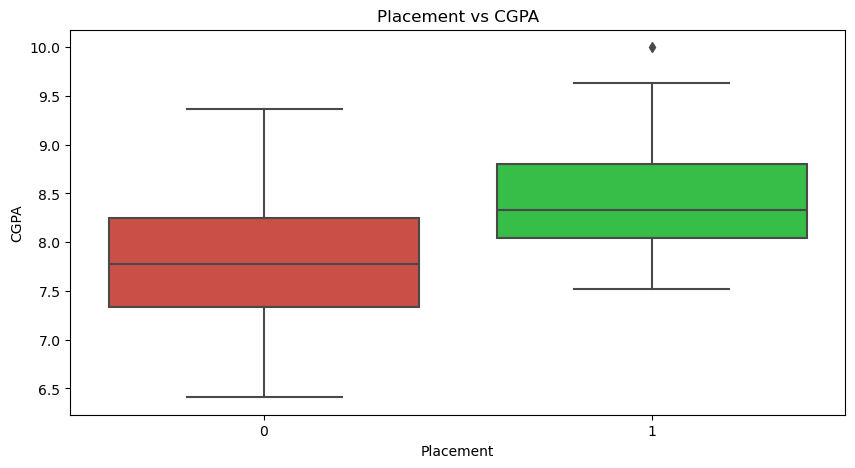

In [10]:
#visualizing the CGPA of the students across Categorical Placed variable
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Placed'],y=df['CGPA'], palette=['#E03C31','#1FD537'])
plt.title('Placement vs CGPA')
plt.xlabel('Placement')
plt.ylabel('CGPA')

plt.show()

Outliers are the data points that significantly deviate from the rest of the data points in the dataset. And these, often affect the efficiency of the model. So, It'd be better to drop this single record now...

In [11]:
print(df[df['CGPA']>9.7].value_counts())

RegNo.      Quants  LogicalReasoning  Verbal  Programming  CGPA  Networking  CloudComp  WebServices  DataAnalytics  QualityAssurance  AI   Placed
T150054001  11      11                10      11           10.0  4.3         8.2        8.4          8.3            8.1               8.0  1         1
dtype: int64


In [12]:
df=(df[df['CGPA']<=9.7])

Let's also check the minimum CGPA Eligibility criteria for a Student to be placed...

In [13]:
placed=df[df['Placed']==1]
print(placed['CGPA'].min())

7.52


**7.5 is the minimum criteria for students to be eligible for placements**

<AxesSubplot:>

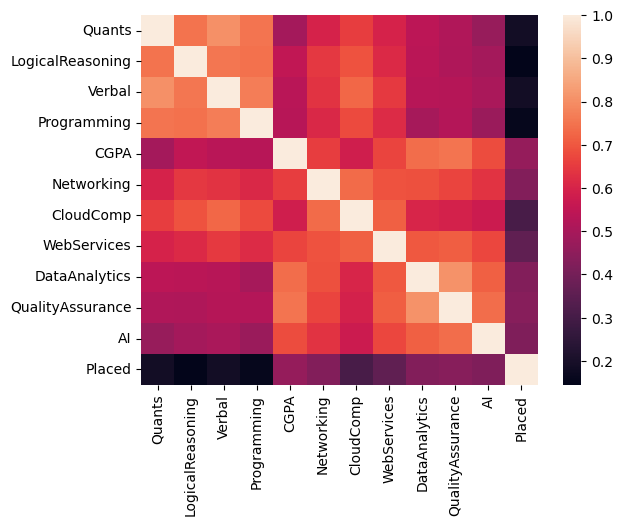

In [14]:
#correlation between all the data features
sns.heatmap(df.select_dtypes(include='number').corr())

**1). Positive Correlations:**

* The **CGPA** has a positive correlation with most of the other variables, such as **Networking, Cloud Computing, Web Services, Data Analytics, Quality Assurance, and AI**. This suggests that students with higher CGPA tend to have higher scores in these subjects.
* **Networking and Cloud Computing** have a relatively strong positive correlation, indicating that students who perform well in Networking tend to perform well in Cloud Computing as well.

**2). Subject Correlations:**

* **Quants and Verbal** have a relatively strong positive correlation, suggesting that students who are good in one of these subjects are likely to be good in the other.
* **Logical Reasoning** has moderate positive correlations with **Quants and Verbal**, indicating that logical reasoning skills may be related to proficiency in mathematics and language skills.

**3).Placement Correlations:**

* The Placed variable has weak positive correlations with **most of the subjects and CGPA**. This suggests that students who perform well in these subjects and have higher CGPA are slightly more likely to be placed.
* Among the technical subjects (Programming, Networking, Cloud Computing, Web Services, Data Analytics, Quality Assurance, and AI), **Cloud Computing and Quality Assurance have relatively stronger positive correlations with placement**.

**4).AI and Data Analytics Correlation:**

* **AI and Data Analytics** have a relatively strong positive correlation, suggesting that students who are skilled in AI are also likely to be skilled in Data Analytics.

**5). Negative Correlation with Placed:**

* The **Placed** variable has **weak negative correlations** with **Logical Reasoning**, suggesting that strong logical reasoning skills may not be strongly associated with placement.

**6). Insights for Skill Sets:**

* Students with higher scores in **Networking, Cloud Computing, Web Services, Data Analytics, Quality Assurance, and AI** tend to have **higher CGPAs**. This could indicate a trend of students excelling in these technical subjects.

In [15]:
corr_matrix=df.select_dtypes(include='number').corr()
corr_placed=corr_matrix['Placed'].drop('Placed')
print(corr_placed)

Quants              0.187851
LogicalReasoning    0.144827
Verbal              0.185094
Programming         0.157662
CGPA                0.465090
Networking          0.426795
CloudComp           0.306407
WebServices         0.356036
DataAnalytics       0.425931
QualityAssurance    0.438302
AI                  0.422068
Name: Placed, dtype: float64


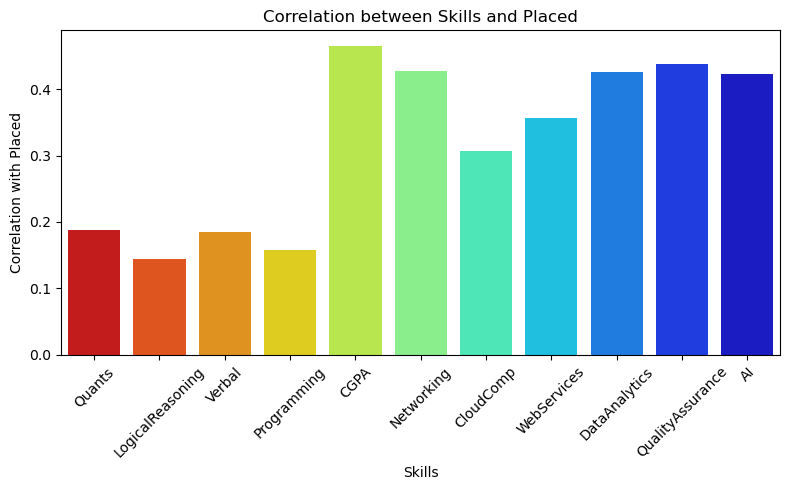

In [16]:
#visualizing the correlation between columns
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_placed.index, y=corr_placed.values, palette='jet_r')
plt.xticks(rotation=45)
plt.xlabel('Skills')
plt.ylabel('Correlation with Placed')
plt.title('Correlation between Skills and Placed')
plt.tight_layout()
plt.show()

**It seems like, the CGPA and Technical skills have a weak positive correlation with our target column. And these are more likely to influence our model's efficiency.**

In [17]:
technical_skills = ['Networking', 'CloudComp', 'WebServices', 'DataAnalytics', 'QualityAssurance', 'AI']
subset_data = df[['CGPA'] + technical_skills]
correlation_matrix = subset_data.corr()
correlation_matrix


,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI
CGPA,1.000000,0.655094,0.583111,0.666456,0.736185,0.752061,0.682536
Networking,0.655094,1.000000,0.733369,0.691477,0.689116,0.667796,0.632654
CloudComp,0.583111,0.733369,1.000000,0.713440,0.604829,0.595564,0.574343
WebServices,0.666456,0.691477,0.713440,1.000000,0.700854,0.710544,0.670016
DataAnalytics,0.736185,0.689116,0.604829,0.700854,1.000000,0.807037,0.713317
QualityAssurance,0.752061,0.667796,0.595564,0.710544,0.807037,1.000000,0.739131
AI,0.682536,0.632654,0.574343,0.670016,0.713317,0.739131,1.000000


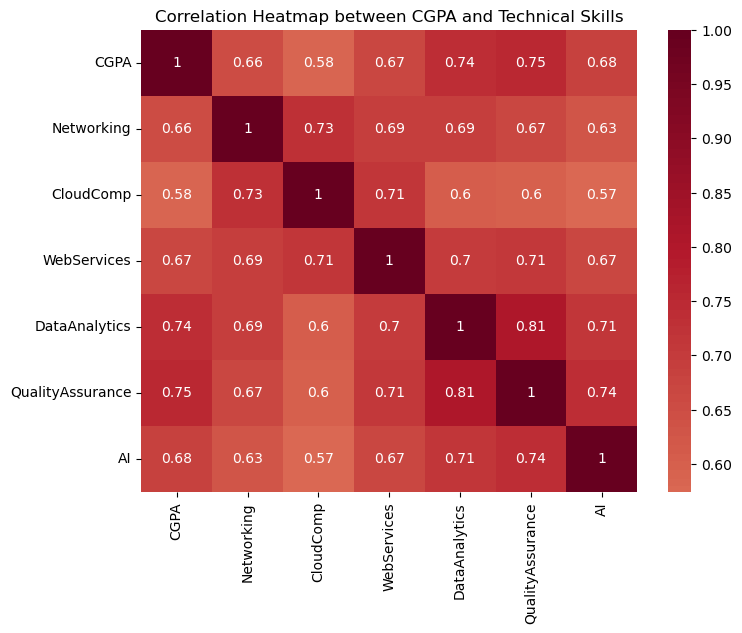

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdGy_r', center=0)
plt.title('Correlation Heatmap between CGPA and Technical Skills')
plt.show()

* All the Technical skills have a positive correlation with CGPA.

* There are no strong negative correlations in the matrix, which indicates that there are no skill sets that consistently oppose each other.

# SUMMARY

* The data has 330 records and 13 features.
* Except the RegNo., all the features are numeric. So, we don't have to deal with categoric data.
* Amongst all the students, only 36.4% are placed.
* Eligibility criteria for CGPA is 7.5 and above. And not all students above 7.5 are placed. This implies that the CGPA is not the only deciding feature.
* The correlation of target feature with all the other features show that technical skills also add to the chances of getting placed.
* All the Technical skills have a positive correlation with CGPA. Indicating that, the students with higher CGPA are likely to have higher skill scores.

# FEATURE ENGINEERING

Let's include columns like average of technical skills, and average of soft skills and check how they influence our target column

In [19]:
tech_skills=df.iloc[:,6:12]
soft_skills=df.iloc[:,1:5]
df['avg_soft']=soft_skills.mean(axis=1)
df['avg_tech']=tech_skills.mean(axis=1)

df.head()

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed,avg_soft,avg_tech
1,T150054002,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1,11.75,8.433333
2,T150054003,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1,10.00,7.633333
3,T150054004,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0,10.75,4.983333
4,T150054005,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0,8.50,4.516667
5,T150054006,12,9,12,11,6.90,2.9,6.2,7.1,3.5,3.7,4.6,0,11.00,4.666667


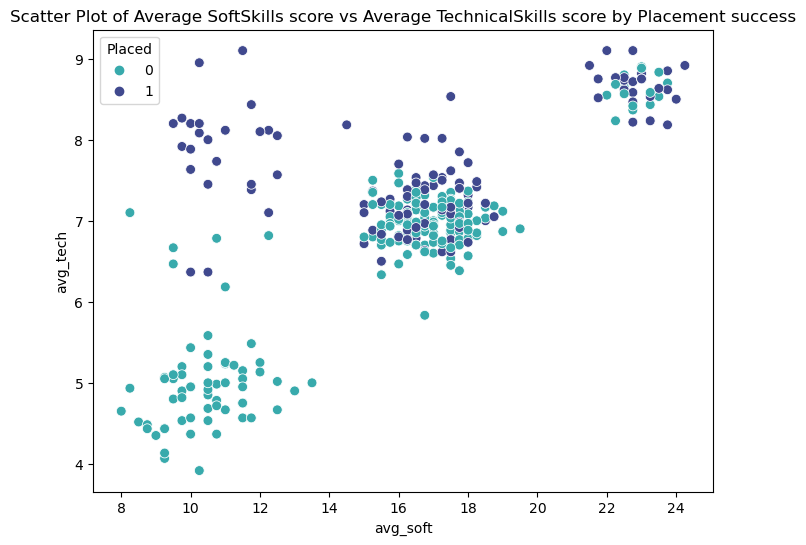

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="avg_soft", y="avg_tech", hue="Placed", s=50, palette='mako_r')
plt.title("Scatter Plot of Average SoftSkills score vs Average TechnicalSkills score by Placement success")
plt.legend(title="Placed")
plt.show()

From the above observation, it'd be wise to pick 'avg_tech' feature as Technical skills had stronger correlation with the target column and also with the CGPA. People with good technical skills are mostly the people with higher CGPA.

We can also include a column 'Domain Interest', it shall include the name that has the highest score amongst the technical skills

In [21]:
df['domain_interest']=tech_skills.idxmax(axis=1)

df.head()

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed,avg_soft,avg_tech,domain_interest
1,T150054002,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1,11.75,8.433333,AI
2,T150054003,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1,10.00,7.633333,Networking
3,T150054004,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0,10.75,4.983333,WebServices
4,T150054005,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0,8.50,4.516667,WebServices
5,T150054006,12,9,12,11,6.90,2.9,6.2,7.1,3.5,3.7,4.6,0,11.00,4.666667,WebServices


# FEATURE SELECTION

We shall hand-pick only few columns that can significantly influence the performance of our model-
* CGPA
* avg_tech
* domain_interest

Seperating the independent and dependent variable

In [22]:
#dropping RegNo. from the independent variables as it has least significance over efficiency of the model
x=df[['CGPA','avg_tech','domain_interest']]
y=df['Placed']

In [23]:
x.shape,y.shape

((329, 3), (329,))

# DATA PREPROCESSING

Scaling only the numerical data

In [24]:
le=LabelEncoder()
x['domain_interest']=le.fit_transform(x['domain_interest'])
x.head()

,CGPA,avg_tech,domain_interest
1,8.80,8.433333,0
2,9.63,7.633333,3
3,6.55,4.983333,5
4,7.27,4.516667,5
5,6.90,4.666667,5


# SMOTETomek SAMPLING TO BALANCE THE DATA

In [25]:
smt=SMOTETomek(random_state=42)
x_sample,y_sample=smt.fit_resample(x,y)

In [26]:
x_sample.shape,y_sample.shape

((368, 3), (368,))

In [27]:
y_sample.value_counts()

1    184
0    184
Name: Placed, dtype: int64

In [28]:
whole_sample=pd.concat([x_sample,y_sample],axis=1)

In [29]:
to_cluster=pd.DataFrame(whole_sample)
to_cluster.to_csv('ClusterData.csv',index=False)

# TRAIN - TEST SPLIT

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=42)

In [31]:
x_train.shape

(294, 3)

In [32]:
x_test.shape

(74, 3)

# MODEL SELECTION

In [33]:
rfc=RandomForestClassifier()
cv=cross_val_score(rfc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84745763 0.83050847 0.77966102 0.79661017 0.81034483]
0.81291642314436


In [34]:
dtc=DecisionTreeClassifier()
cv=cross_val_score(dtc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76271186 0.83050847 0.79661017 0.79661017 0.79310345]
0.7959088252483928


In [35]:
svc=SVC(probability=True,kernel='rbf')
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.71186441 0.79661017 0.55932203 0.83050847 0.81034483]
0.7417299824663939


In [36]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83050847 0.76271186 0.77966102 0.79661017 0.79310345]
0.7925189947399182


# RANDOM FOREST CLASSIFIER IS THE BEST FIT!

In [37]:
model=RandomForestClassifier(max_depth=5)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

# PREDICTION

In [38]:
y_pred=model.predict(x_test)

In [39]:
predictions=pd.DataFrame({'actual y':y_test,'pred_y':y_pred})
predictions.head()

,actual y,pred_y
165,1,1
33,0,0
15,0,0
312,1,1
57,0,0


In [40]:
model.predict([[8.6,8.3,3]])

array([1])

In [41]:
model.predict([[6.5,5.4,1]])

array([0])

# MODEL EVALUATION

In [42]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Placed,,
0,36,5
1,7,26


In [43]:
acc=accuracy_score(y_test,y_pred)
acc

0.8378378378378378

In [44]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.84      0.79      0.81        33

    accuracy                           0.84        74
   macro avg       0.84      0.83      0.83        74
weighted avg       0.84      0.84      0.84        74



## DEPLOYMENT

In [45]:
!pip install -U ibm-watson-machine-learning

In [46]:
from ibm_watson_machine_learning import APIClient

## AUTHENTICATION AND SET SPACE

In [47]:
wml_credentials={
    "apikey": "T03d-j6LiE8YAeb6OweyWL2tIWh_3-8ca4HZfOd7eArr",
    "url": "https://us-south.ml.cloud.ibm.com"
}

In [48]:
wml_client=APIClient(wml_credentials)

In [50]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
38ec33dd-6fdb-48c0-80a1-0a06aad359b2  placement  2023-08-26T17:19:16.446Z
------------------------------------  ---------  ------------------------


,ID,NAME,CREATED
0,38ec33dd-6fdb-48c0-80a1-0a06aad359b2,placement,2023-08-26T17:19:16.446Z


In [51]:
SPACE_ID = "38ec33dd-6fdb-48c0-80a1-0a06aad359b2"

In [52]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [53]:
wml_client.software_specifications.list(100)

-----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                           ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10        01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10       079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch-onnx_

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,supported,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,supported,
...,...,...,...,...,...
95,autoai-kb_3.0-py3.6,d139f196-e04b-5d8b-9140-9a10ca1fa91a,base,unsupported,autoai-kb_rt22.2-py3.10
96,spark-mllib_3.0-py36,d82546d5-dd78-5fbb-9131-2ec309bc56ed,base,unsupported,spark-mllib_3.3
97,autoai-kb_3.4-py3.8,da9b39c3-758c-5a4f-9cfd-457dd4d8c395,base,unsupported,autoai-kb_rt22.2-py3.10
98,kernel-spark3.2-r3.6,db2fe4d6-d641-5d05-9972-73c654c60e0a,base,not_provided,


## SAVE AND DEPLOY

In [54]:
MODEL_NAME = "placement"
DEPLOYMENT_NAME = "placement"
DEMO_MODEL = model

In [55]:
#setting python version

software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [56]:
import sklearn
sklearn.__version__

'1.1.1'

In [57]:
#setup model meta

model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_1.1",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [58]:
#saving model

model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = x_train, 
    training_target = y_train )

In [59]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Placed',
  'schemas': {'input': [{'fields': [{'name': 'CGPA', 'type': 'float64'},
      {'name': 'avg_tech', 'type': 'float64'},
      {'name': 'domain_interest', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'CGPA', 'type': 'float64'},
      {'name': 'avg_tech', 'type': 'float64'},
      {'name': 'domain_interest', 'type': 'int64'}],
     'id': '1',
     'type': 'DataFrame'},
    'type': 'container'}],
  'type': 'scikit-learn_1.1'},
 'metadata': {'created_at': '2023-08-26T18:15:30.693Z',
  'id': 'c5257aa8-d54c-4a16-b0d6-8cdb70b8cef9',
  'modified_at': '2023-08-26T18:15:32.462Z',
  'name': 'placement',
  'owner': 'IBMid-691000203P',
  'resource_key': '7a087d27-1605-43ff-a4a1-e83c871d6b5a',
 

In [61]:
model_id = wml_client.repository.get_model_id(model_details)

In [62]:
model_id

'c5257aa8-d54c-4a16-b0d6-8cdb70b8cef9'

In [63]:
#set meta

deployment_props = {
     wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
    
    
}

In [64]:
#DEPLOY

deployment = wml_client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'c5257aa8-d54c-4a16-b0d6-8cdb70b8cef9' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8d7981c8-8ffb-42e1-a150-069bd46921ac'
------------------------------------------------------------------------------------------------


